In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [18]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

In [3]:
postgres_user = "dsbc_student"
postgres_pw = "7*.8G9QH21"
postgres_host = "142.93.121.174"
postgres_port = "5432"
postgres_db = "useducation"

engine = create_engine(
    "postgresql://{}:{}@{}:{}/{}".format(
        postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db
    )
)

df = pd.read_sql_query("select * from {}".format(postgres_db), con=engine)

# no need for an open connection,
# as we're only doing a single query
engine.dispose()

<IPython.core.display.Javascript object>

In [4]:
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


<IPython.core.display.Javascript object>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1492 non-null   object 
 1   STATE                         1492 non-null   object 
 2   YEAR                          1492 non-null   int64  
 3   ENROLL                        1229 non-null   float64
 4   TOTAL_REVENUE                 1280 non-null   float64
 5   FEDERAL_REVENUE               1280 non-null   float64
 6   STATE_REVENUE                 1280 non-null   float64
 7   LOCAL_REVENUE                 1280 non-null   float64
 8   TOTAL_EXPENDITURE             1280 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1280 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1280 non-null   float64
 11  OTHER_EXPENDITURE             1229 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1280 non-null   float64
 13  GRA

<IPython.core.display.Javascript object>

In [7]:
df.isnull().sum() / df.isnull().count()

PRIMARY_KEY                     0.000000
STATE                           0.000000
YEAR                            0.000000
ENROLL                          0.176273
TOTAL_REVENUE                   0.142091
FEDERAL_REVENUE                 0.142091
STATE_REVENUE                   0.142091
LOCAL_REVENUE                   0.142091
TOTAL_EXPENDITURE               0.142091
INSTRUCTION_EXPENDITURE         0.142091
SUPPORT_SERVICES_EXPENDITURE    0.142091
OTHER_EXPENDITURE               0.176273
CAPITAL_OUTLAY_EXPENDITURE      0.142091
GRADES_PK_G                     0.115952
GRADES_KG_G                     0.088472
GRADES_4_G                      0.087802
GRADES_8_G                      0.087802
GRADES_12_G                     0.087802
GRADES_1_8_G                    0.087802
GRADES_9_12_G                   0.087802
GRADES_ALL_G                    0.115952
AVG_MATH_4_SCORE                0.640751
AVG_MATH_8_SCORE                0.643432
AVG_READING_4_SCORE             0.642761
AVG_READING_8_SC

<IPython.core.display.Javascript object>

In [9]:
fill_list = [
    "ENROLL",
    "TOTAL_REVENUE",
    "FEDERAL_REVENUE",
    "STATE_REVENUE",
    "LOCAL_REVENUE",
    "TOTAL_EXPENDITURE",
    "INSTRUCTION_EXPENDITURE",
    "SUPPORT_SERVICES_EXPENDITURE",
    "OTHER_EXPENDITURE",
    "CAPITAL_OUTLAY_EXPENDITURE",
    "GRADES_PK_G",
    "GRADES_KG_G",
    "GRADES_4_G",
    "GRADES_8_G",
    "GRADES_12_G",
    "GRADES_1_8_G",
    "GRADES_9_12_G",
    "GRADES_ALL_G",
]

<IPython.core.display.Javascript object>

In [11]:
education3_df = df.copy()

years = education3_df["YEAR"].unique()

for col in fill_list:
    for year in years:
        education3_df.loc[education3_df["YEAR"] == year, col] = education3_df.loc[
            education3_df["YEAR"] == year, col
        ].fillna(education3_df[education3_df["YEAR"] == year][col].mean())

<IPython.core.display.Javascript object>

In [12]:
education4_df = df.copy()

for col in fill_list:
    education4_df.loc[:, col] = education4_df.loc[:, col].interpolate()

<IPython.core.display.Javascript object>

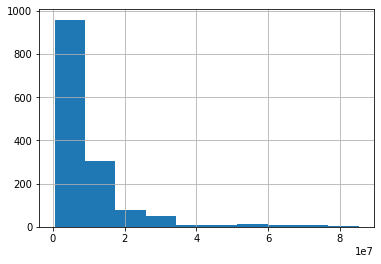

<IPython.core.display.Javascript object>

In [15]:
education3_df["TOTAL_EXPENDITURE"].hist()

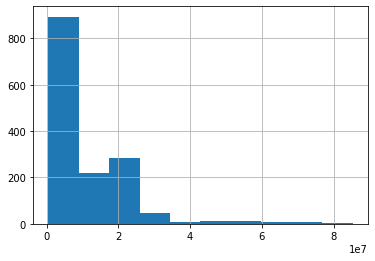

<IPython.core.display.Javascript object>

In [13]:
education4_df["TOTAL_EXPENDITURE"].hist()

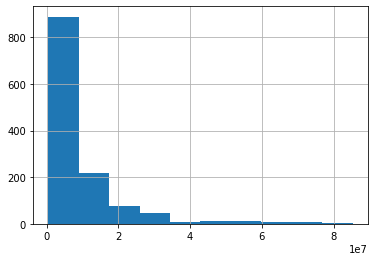

<IPython.core.display.Javascript object>

In [14]:
df["TOTAL_EXPENDITURE"].hist()

In [16]:
cols = ["TOTAL_EXPENDITURE", "TOTAL_REVENUE"]

<IPython.core.display.Javascript object>

In [19]:
df = education3_df.copy()

<IPython.core.display.Javascript object>

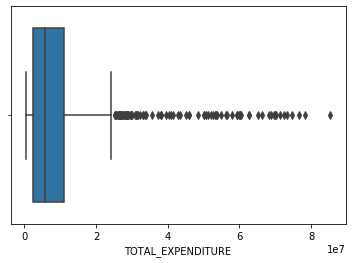

<IPython.core.display.Javascript object>

In [20]:
sns.boxplot(df[cols[0]])

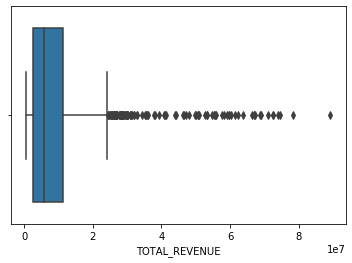

<IPython.core.display.Javascript object>

In [21]:
sns.boxplot(df[cols[1]])

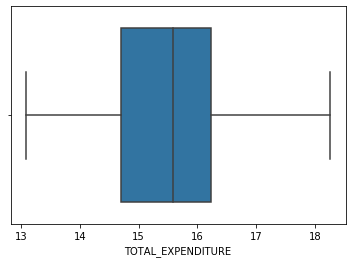

<IPython.core.display.Javascript object>

In [23]:
sns.boxplot(np.log(df[cols[0]]))

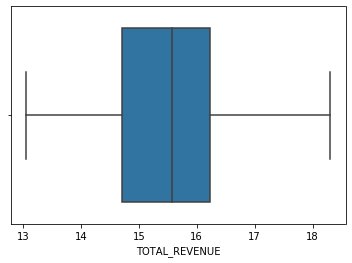

<IPython.core.display.Javascript object>

In [22]:
sns.boxplot(np.log(df[cols[1]]))

In [24]:
log_rev = np.log(df[cols[1]])
log_expend = np.log(df[cols[0]])

<IPython.core.display.Javascript object>

In [34]:
# now we take the log of the video views and calculate
# the quartiles accordingly.
q75, q25 = np.percentile(log_rev, [75, 25])
iqr = q75 - q25

for threshold in np.arange(1, 5, 0.5):
    min_val = q25 - (iqr * threshold)
    max_val = q75 + (iqr * threshold)
    print("The score threshold is: {}".format(threshold))
    print(
        "Number of outliers is: {}".format(
            len((np.where((log_rev > max_val) | (log_rev < min_val))[0]))
        )
    )

The score threshold is: 1.0
Number of outliers is: 0
The score threshold is: 1.5
Number of outliers is: 0
The score threshold is: 2.0
Number of outliers is: 0
The score threshold is: 2.5
Number of outliers is: 0
The score threshold is: 3.0
Number of outliers is: 0
The score threshold is: 3.5
Number of outliers is: 0
The score threshold is: 4.0
Number of outliers is: 0
The score threshold is: 4.5
Number of outliers is: 0


<IPython.core.display.Javascript object>

In [35]:
# now we take the log of the video views and calculate
# the quartiles accordingly.
q75, q25 = np.percentile(log_expend, [75, 25])
iqr = q75 - q25

for threshold in np.arange(1, 5, 0.5):
    min_val = q25 - (iqr * threshold)
    max_val = q75 + (iqr * threshold)
    print("The score threshold is: {}".format(threshold))
    print(
        "Number of outliers is: {}".format(
            len((np.where((log_expend > max_val) | (log_expend < min_val))[0]))
        )
    )

The score threshold is: 1.0
Number of outliers is: 0
The score threshold is: 1.5
Number of outliers is: 0
The score threshold is: 2.0
Number of outliers is: 0
The score threshold is: 2.5
Number of outliers is: 0
The score threshold is: 3.0
Number of outliers is: 0
The score threshold is: 3.5
Number of outliers is: 0
The score threshold is: 4.0
Number of outliers is: 0
The score threshold is: 4.5
Number of outliers is: 0


<IPython.core.display.Javascript object>

In [36]:
df["deficit"] = df[cols[1]] - df[cols[0]]

<IPython.core.display.Javascript object>

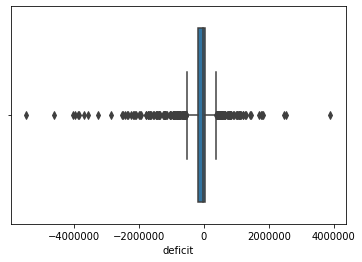

<IPython.core.display.Javascript object>

In [39]:
sns.boxplot(df["deficit"])

In [40]:
log_def = np.log(df["deficit"])

<IPython.core.display.Javascript object>

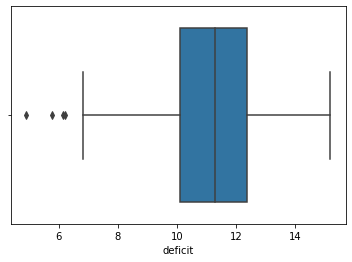

<IPython.core.display.Javascript object>

In [41]:
sns.boxplot(log_def)

In [42]:
pre_log_def = log_rev - log_expend

<IPython.core.display.Javascript object>

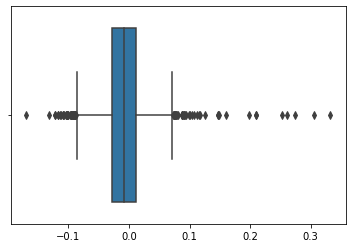

<IPython.core.display.Javascript object>

In [43]:
sns.boxplot(pre_log_def)

In [44]:
sqrt_pre_log_def = np.sqrt(pre_log_def)

<IPython.core.display.Javascript object>

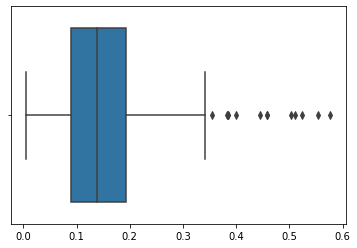

<IPython.core.display.Javascript object>

In [45]:
sns.boxplot(sqrt_pre_log_def)

In [46]:
log_pre_log_def = np.log(pre_log_def)

<IPython.core.display.Javascript object>

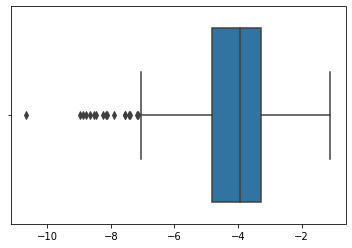

<IPython.core.display.Javascript object>

In [47]:
sns.boxplot(log_pre_log_def)